# PyScanCf Example 1
- author: @syedhamidali
- date: Sep 8, 2023

In [1]:
import glob

import pyart

import pyscancf as pcf

print(pcf.__version__)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119


## Cite PyScanCf:

## Syed, H. A., Sayyed, I., Kalapureddy, M. C. R., & Grandhi, K. K. (2021).
## PyScanCf – The library for individual sweep datasets of IMD weather radars.
## Zenodo. https://doi.org/10.5281/zenodo.5574160

999


Setup the paths for the input and output data, `!ls $inp` shows the raw IMD data files, this is how the B-type (short range - high resolution) IMD DWR data looks like.

In [3]:
inp = "/Users/syed44/Downloads/Others/Git_Stuff/imd_temp_radar/B/"
out = "/Users/syed44/Downloads/Others/Git_Stuff/imd_temp_radar/out/"
!ls $inp

GOA210516024101-IMD-B.nc   GOA210516030244-IMD-B.nc
GOA210516024101-IMD-B.nc.1 GOA210516030244-IMD-B.nc.1
GOA210516024101-IMD-B.nc.2 GOA210516030244-IMD-B.nc.2
GOA210516024101-IMD-B.nc.3 GOA210516030244-IMD-B.nc.3
GOA210516024101-IMD-B.nc.4 GOA210516030244-IMD-B.nc.4
GOA210516024101-IMD-B.nc.5 GOA210516030244-IMD-B.nc.5
GOA210516024101-IMD-B.nc.6 GOA210516030244-IMD-B.nc.6
GOA210516024101-IMD-B.nc.7 GOA210516030244-IMD-B.nc.7
GOA210516024101-IMD-B.nc.8 GOA210516030244-IMD-B.nc.8
GOA210516024101-IMD-B.nc.9 GOA210516030244-IMD-B.nc.9


In [4]:
help(pcf.cfrad)

Help on function cfrad in module pyscancf.pyscancf:

cfrad(
    input_dir,
    output_dir,
    scan_type='B',
    dualpol=False,
    gridder=False,
    plot=None,
    nf=None
)
    Aggregate radar data into CfRadial1 format.

    Parameters
    ----------
    input_dir : str
        The directory path containing single-sweep radar data files.

    output_dir : str
        The directory path where the output data will be saved in CfRadial1 format.

    scan_type : str, optional
        The scan type, either "B" for short-range PPI (Plan Position Indicator)
        or "C" for long-range PPI. Default is "B".

    dualpol : bool, optional
        Specifies whether the radar data contains dual-polarization products
        such as ZDR (Differential Reflectivity) and RHOHV (Correlation Coefficient).
        Set to True if present, otherwise False. Default is False.

    gridder : bool, optional
        Indicates whether data gridding should be performed. Set to True for data
        gridding

Let's see what we have got into `pcf.cfrad()` function. 
- It aggregates data to cfradial1 data. It takes inputs such as `input_dir`, `output_dir`, `scan_type`, `dualpol`, `gridder`, `plot`, and `nf`.
- `input_dir` specifies the path of single sweep data directory, while `output_dir` specifies the path for output data.
- `scan_type` takes two options: `B` for short-range PPI, and `C` for long-range PPI. 
- The `dualpol` parameter is set to True if the data contains dual-polarization products like ZDR and RHOHV. 
- `gridder` is a boolean parameter, which is set to True if the user wants to create a gridded output. 
- The `plot` argument is used to generate a cappi plot. It can be set to `REF`, `VELH`, `WIDTH`, or `ALL`. The names are not case-sensitive and will be taken care of by the `plot_cappi()` function. For example, if the data has a `reflectivity` field named `DBZ`, you can still write `REF` or `reflectivity`, and same is for other radar moments.
- Lastly, `nf` is an integer parameter that specifies the number of files to group together, it is usually `10` for type `B`, and `2` or `3` for type `C` data.

In [5]:
pcf.cfrad(input_dir=inp, output_dir=out, scan_type="B", gridder=True)

2025-04-19 11:46:32,063 - INFO - Packing 20 sweeps into 2 volumes
2025-04-19 11:46:32,064 - INFO - Processing volume 1
2025-04-19 11:46:33,041 - INFO - Saved cfrad_GOA210516024101-IMD-B.nc
2025-04-19 11:46:46,753 - INFO - Saved grid_GOA210516024101-IMD-B.nc
2025-04-19 11:46:46,753 - INFO - Processing volume 2
2025-04-19 11:46:47,707 - INFO - Saved cfrad_GOA210516030244-IMD-B.nc
2025-04-19 11:47:01,375 - INFO - Saved grid_GOA210516030244-IMD-B.nc
2025-04-19 11:47:01,376 - INFO - Data merging done 
Time Taken: 0:00:54.063542


In [6]:
!ls $out

Max-REF_GOA_20210516024104.png cfrad_GOA210516030244-IMD-B.nc
Max-REF_GOA_20210516030306.png grid_GOA210516024101-IMD-B.nc
cfrad_GOA210516024101-IMD-B.nc grid_GOA210516030244-IMD-B.nc


In [7]:
files = glob.glob(out + "grid*")

...............................
Plotting Max-Z 20210516024104
...............................

...............................
Plotting Max-Z 20210516030306
...............................



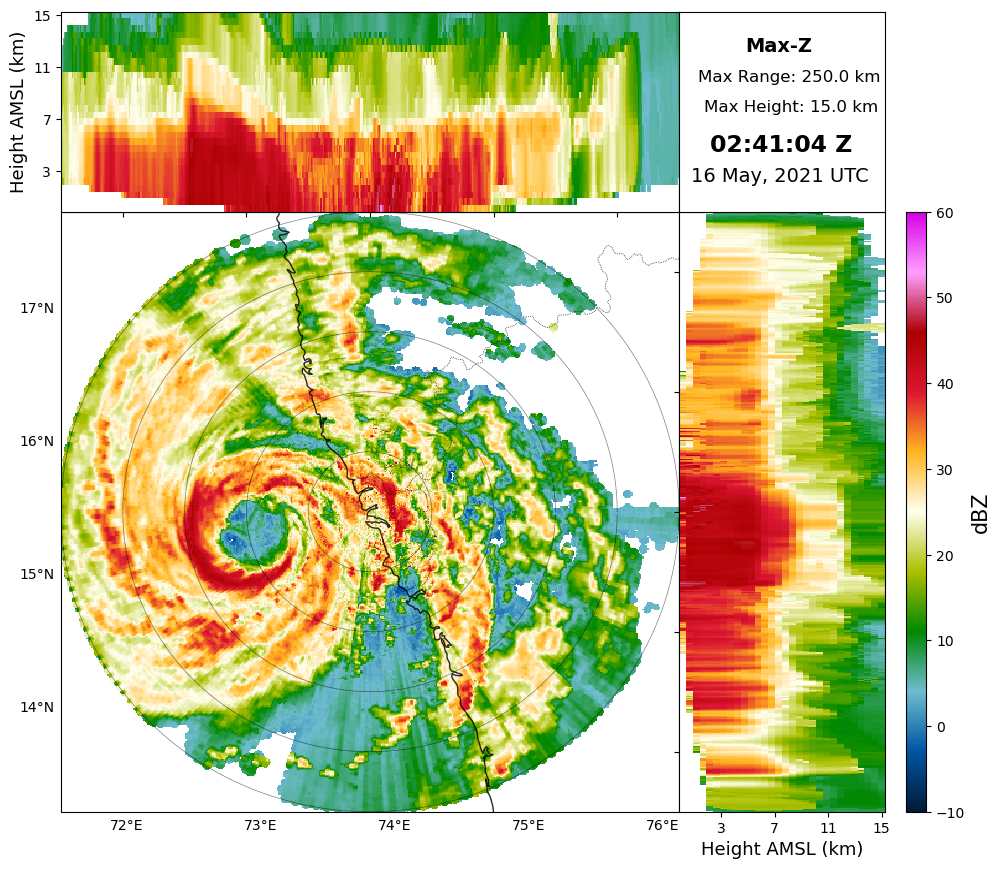

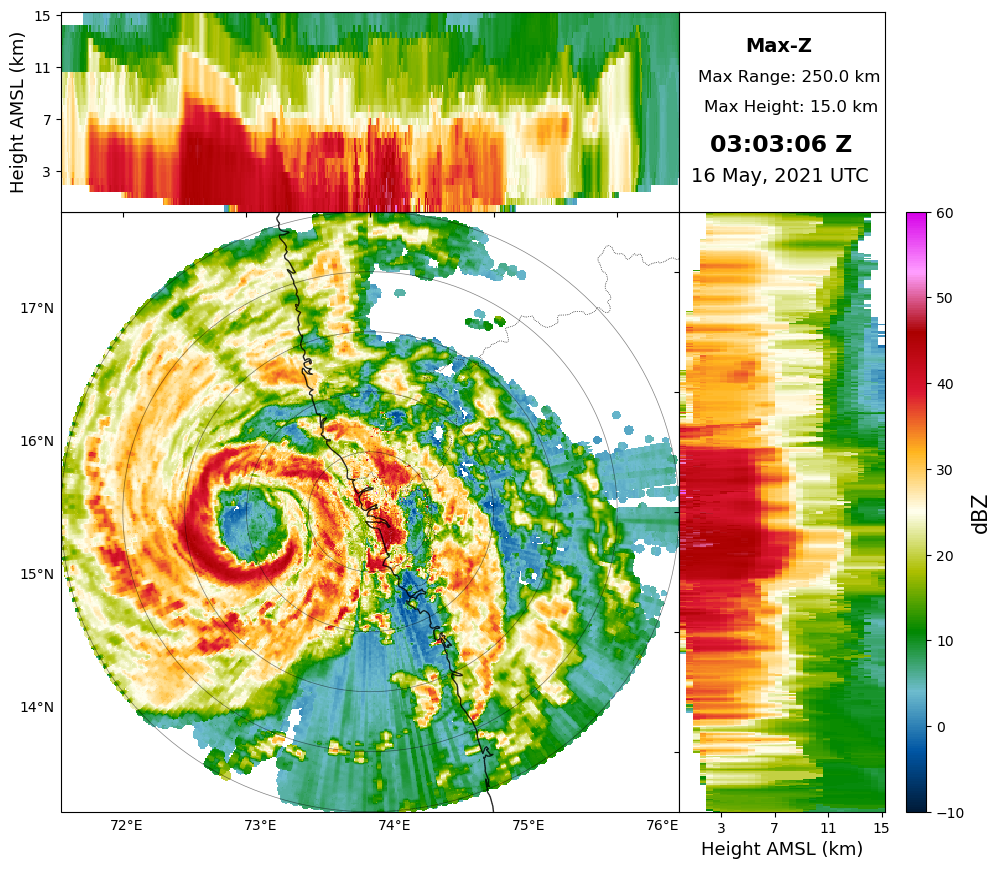

In [12]:
for file in files:
    grid = pyart.io.read_grid(file)
    pcf.plot_cappi(
        grid,
        "Z",
        cmap="SyedSpectral",  # optional
        crosshair=False,  # optional
        savedir=None,  # optional
        show_figure=True,  # optional
        vmin=-10,
        vmax=60,
    )

In [13]:
for file in files:
    grid = pyart.io.read_grid(file)
    pcf.plot_cappi(
        grid,
        "Z",
        cmap="HomeyerRainbow",  # optional
        crosshair=False,  # optional
        savedir=out,  # optional
        show_figure=False,  # optional
    )

...............................
Plotting Max-Z 20210516024104
...............................

Figure(s) saved as /Users/syed44/Downloads/Others/Git_Stuff/imd_temp_radar/out//Max-Z_GOA_20210516024104.png
...............................
Plotting Max-Z 20210516030306
...............................

Figure(s) saved as /Users/syed44/Downloads/Others/Git_Stuff/imd_temp_radar/out//Max-Z_GOA_20210516030306.png
